In [3]:
# from google.colab import files


# uploaded = files.upload()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data=pd.read_csv('Airbnb_limpio_v2.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102091 entries, 0 to 102090
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood group             102091 non-null  int64  
 1   neighbourhood                   102091 non-null  int64  
 2   lat                             102091 non-null  float64
 3   long                            102091 non-null  float64
 4   instant_bookable                102091 non-null  int64  
 5   cancellation_policy             102091 non-null  int64  
 6   room type                       102091 non-null  int64  
 7   Construction year               102091 non-null  float64
 8   price                           102091 non-null  float64
 9   service fee                     102091 non-null  float64
 10  minimum nights                  102091 non-null  float64
 11  number of reviews               102091 non-null  float64
 12  reviews per mont

Realizamos el modelo de prediccion con Regresion Lineal Multiple y despues con Random Forest

In [3]:
# Dividir datos en conjuntos de entrenamiento y prueba
columnas_a_eliminar = ['price', 'service fee']
X = data.drop(columnas_a_eliminar, axis=1)  # Características
y = data['price']  # Etiquetas (precios)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Realizar predicciones en conjunto de prueba
predictions = model.predict(X_test)

In [6]:
# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio:", mse)

from sklearn.metrics import mean_absolute_error, r2_score

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared = r2_score(y_test, predictions)
print("Coeficiente de determinación (R-cuadrado):", r_squared)

Error cuadrático medio: 109526.63102742819
Error absoluto medio (MAE): 285.7515307393088
Coeficiente de determinación (R-cuadrado): -0.0002097744538702706


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Número de árboles = 100

# Entrenar el modelo
forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_forest = forest_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_forest = mean_squared_error(y_test, predictions_forest)
print("Error cuadrático medio (Random Forest):", mse_forest)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_forest = r2_score(y_test, predictions_forest)
print("Coeficiente de determinación (R-cuadrado, Random Forest):", r_squared_forest)

Error cuadrático medio (Random Forest): 70733.88745632286
Coeficiente de determinación (R-cuadrado, Random Forest): 0.3540500154595563


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Realizar predicciones en el conjunto de prueba
predictions_ann = ann_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_ann = mean_squared_error(y_test, predictions_ann)
print("Error cuadrático medio (Red Neuronal):", mse_ann)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_ann = r2_score(y_test, predictions_ann)
print("Coeficiente de determinación (R-cuadrado, Red Neuronal):", r_squared_ann)


c:\Users\Nico\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 126825.9922 - val_loss: 110416.1719
Epoch 2/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110819.0781 - val_loss: 109660.4375
Epoch 3/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110139.1172 - val_loss: 109583.8984
Epoch 4/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110603.9297 - val_loss: 109462.0234
Epoch 5/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110030.8125 - val_loss: 109454.3281
Epoch 6/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110386.5547 - val_loss: 109987.6094
Epoch 7/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 109872.1484 - val_loss: 109950.0234
Epoch 8/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110433.1406 - val_loss: 110746.2891
Epoch 9/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 110051.1016 - val_loss: 109631.5859
Epoch 10/100
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 110059.4375 - val_loss: 109430.2500
Epoch 11/

In [9]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un modelo SVR
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))

# Entrenar el modelo
svr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_svr = svr_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_svr = mean_squared_error(y_test, predictions_svr)
print("Error cuadrático medio (SVR):", mse_svr)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_svr = r2_score(y_test, predictions_svr)
print("Coeficiente de determinación (R-cuadrado, SVR):", r_squared_svr)

Error cuadrático medio (SVR): 110325.717758978
Coeficiente de determinación (R-cuadrado, SVR): -0.007507126267169095


El que ha tenido una mejor performance ha sido el Random Forest(tambien hemos probado el resto de los modelos redes neurales, arboles de desiciones, SVR y el de mejor performance fue random forest) por lo que continuaremos trabajando con este a partir de ahora

Revisamos y solo utilizamos algunas columnas para realizar el modelo. El conjunto resultante fue el de mejor performance

In [11]:

# Dividir datos en conjuntos de entrenamiento y prueba
columnas_a_eliminar = ['price', 'service fee','neighbourhood group','neighbourhood','instant_bookable','cancellation_policy','Construction year']
X = data.drop(columnas_a_eliminar, axis=1)  # Características
y = data['price']  # Etiquetas (precios)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Número de árboles = 100

# Entrenar el modelo
forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_forest = forest_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_forest = mean_squared_error(y_test, predictions_forest)
print("Error cuadrático medio (Random Forest):", mse_forest)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_forest = r2_score(y_test, predictions_forest)
print("Coeficiente de determinación (R-cuadrado, Random Forest):", r_squared_forest)

Error cuadrático medio (Random Forest): 68177.61214171321
Coeficiente de determinación (R-cuadrado, Random Forest): 0.37739421523894534


Como sigue dando un valor de acertacion bajo, realizamos un analisis para determinar cual es el problema. Primero realizamos la visualizacion de todas las variables y despues ejecutamos el modelo de Random Forest Obteniendo los datos de acertacion en el set de datos de entrenamiento y en el de prueba

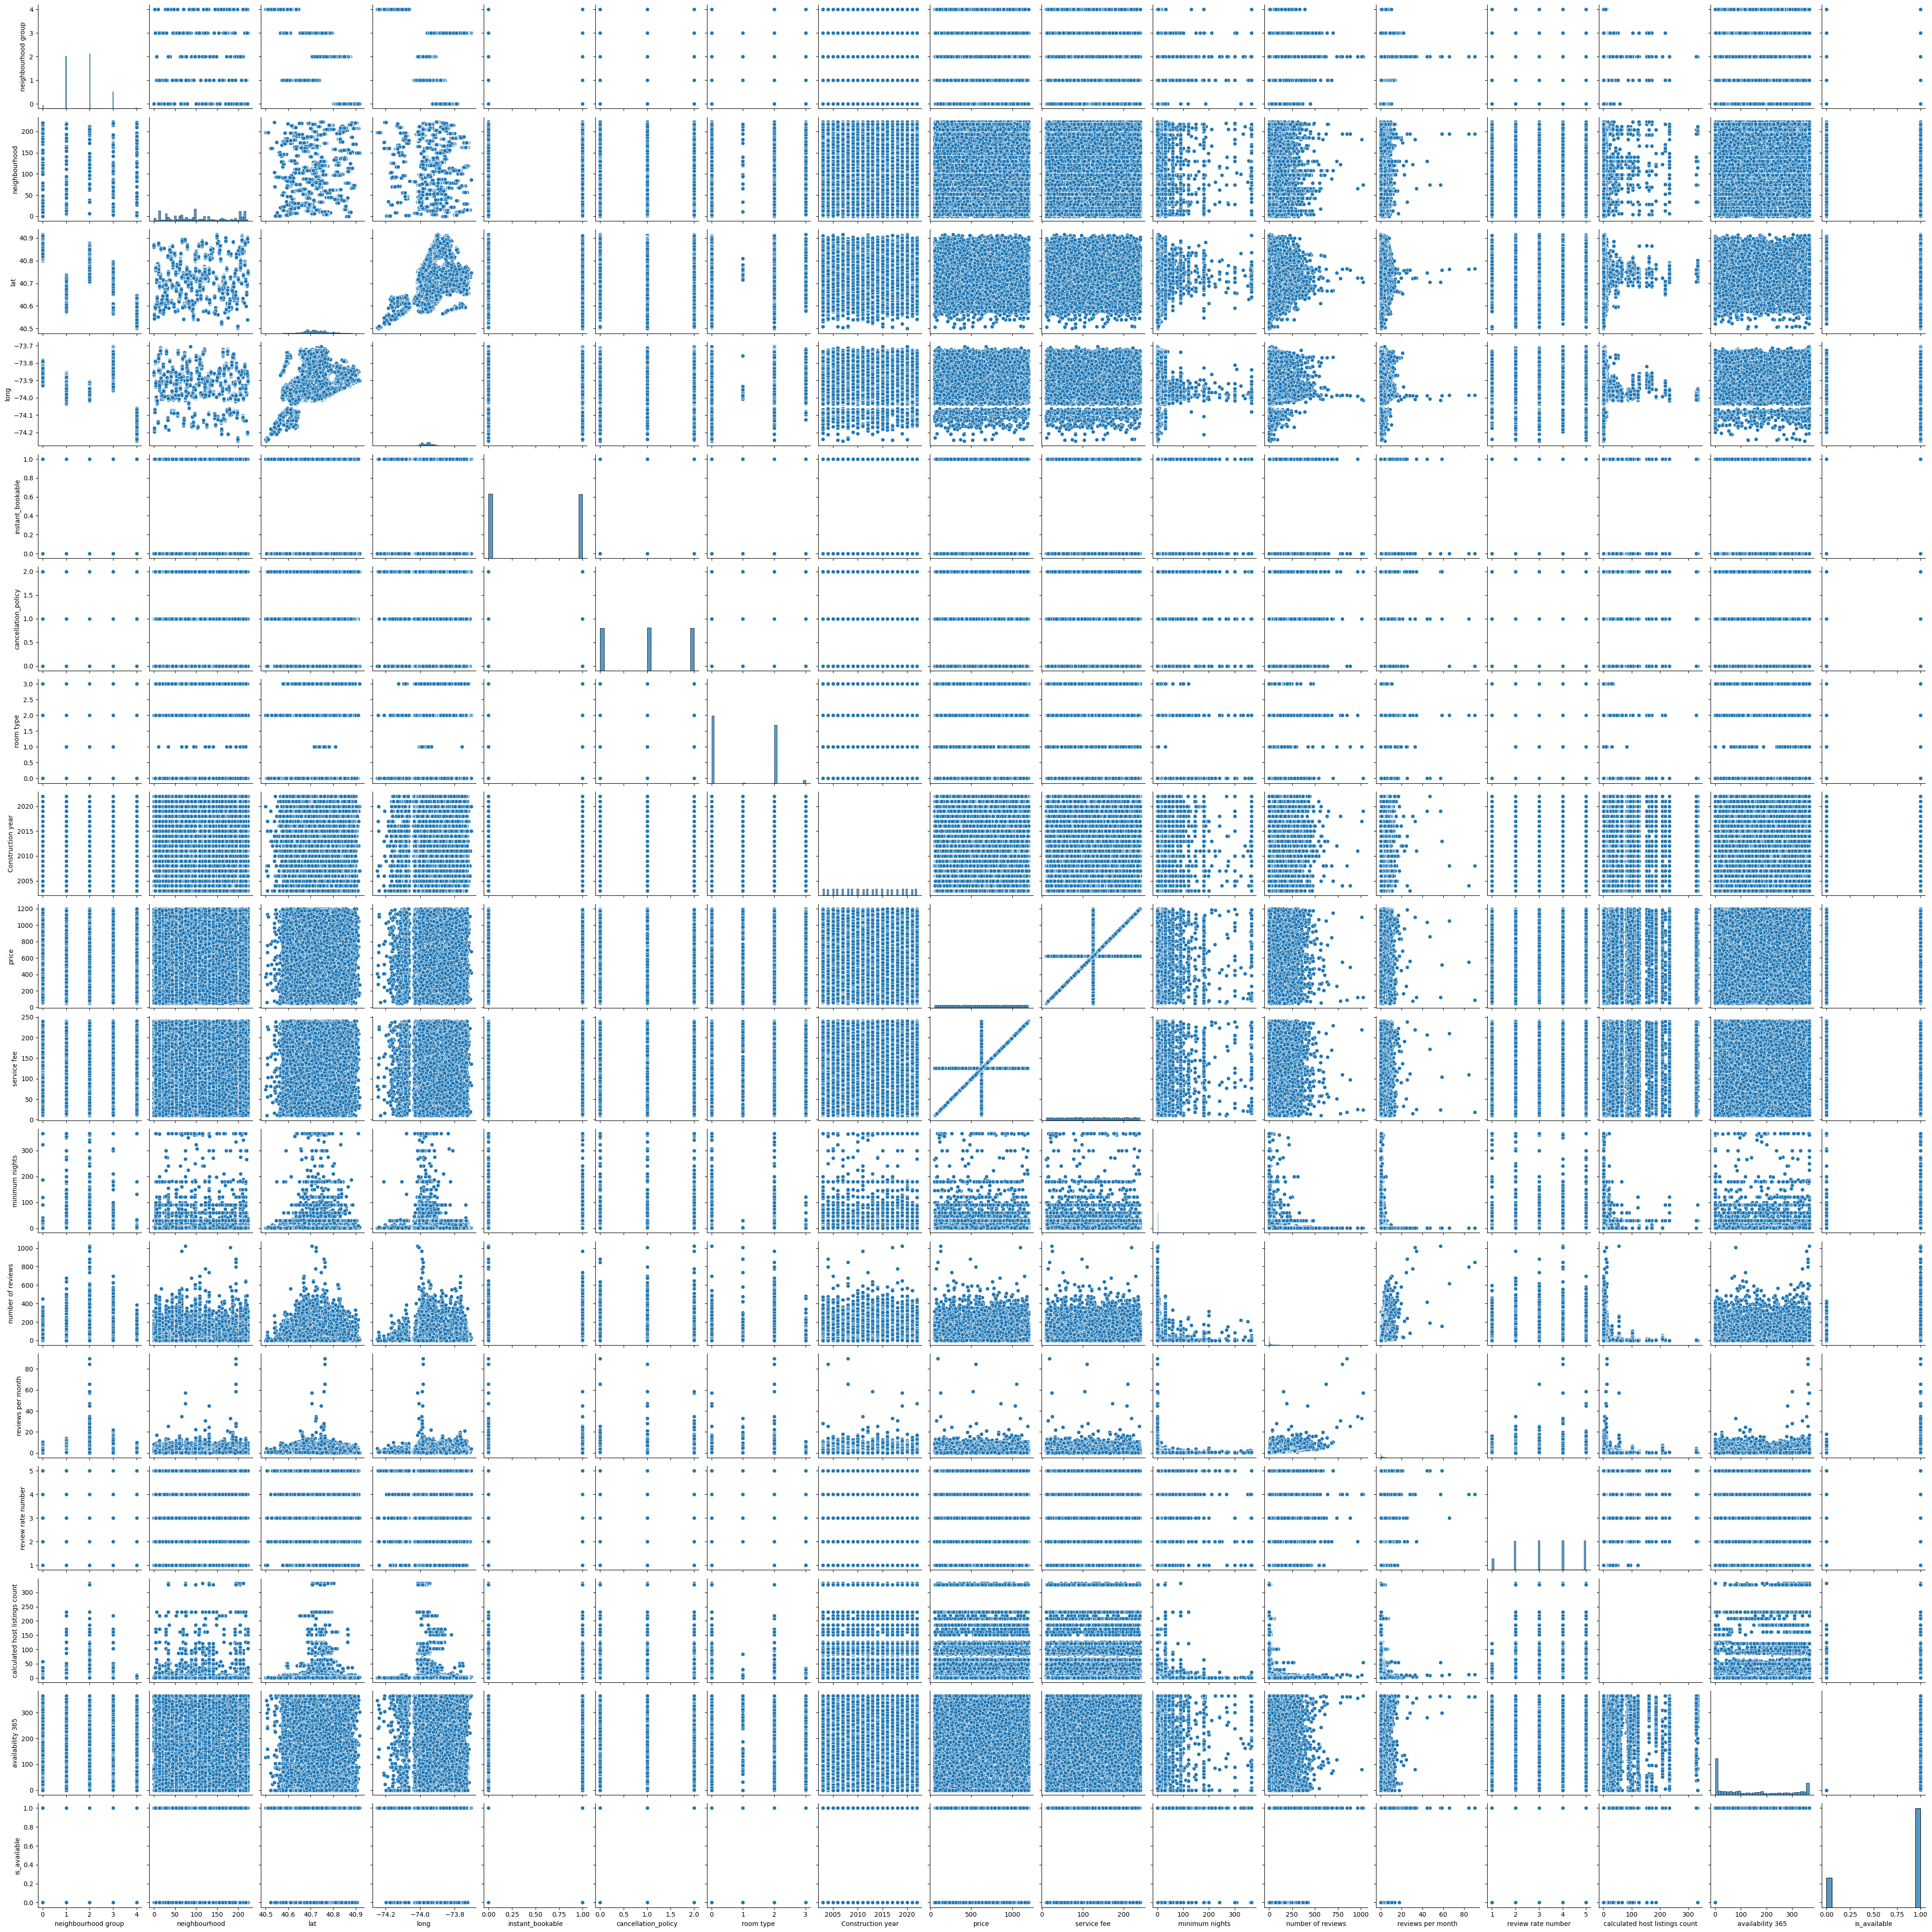

Entrenamiento: 
MSE: 9860.285352189385
MAE: 74.0968402797957
R2: 0.9101996800188619

Prueba: 
MSE: 68291.50534388788
MAE: 198.3650498912855
R2: 0.37635412943524293


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Análisis Exploratorio de Datos
sns.pairplot(data)
plt.show()

# Dividir los datos en características y objetivo
columnas_a_eliminar = ['price', 'service fee','neighbourhood group','neighbourhood','instant_bookable','cancellation_policy','Construction year']
X = data.drop(columnas_a_eliminar, axis=1)
y = data['price']

# Preprocesamiento
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline de RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Ajustar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluación del modelo
print("Entrenamiento: ")
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("R2:", r2_score(y_train, y_pred_train))

print("\nPrueba: ")
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))


Vemos una alta acertacion en el set de entrenamiento y uno bajo en el de prueba. Por lo que podemos determinar que el modelo esta sobreajustado.

Para tratar de evitar esto realizamos validacion cruzada y ajuste de hiperparametros

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Preprocesamiento
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline de RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Definir la búsqueda de hiperparámetros
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por la búsqueda de hiperparámetros
best_model = grid_search.best_estimator_

# Evaluación del modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
print("Prueba: ")
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))

# Resultados de la búsqueda de hiperparámetros
print("Mejores hiperparámetros encontrados: ", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Prueba: 
MSE: 79840.61281961834
MAE: 234.86703762240498
R2: 0.2708863534698609
Mejores hiperparámetros encontrados:  {'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


Como sigue sin haber una diferencia significante, seguimos probando otros metodos, ademas del toepo de procesamiento, unas 3 horas aproximado. En este caso usamos XGBRegressor con ajuste de hiperparametros

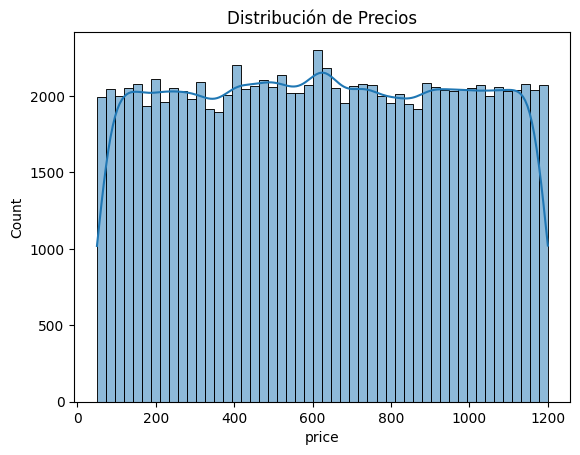

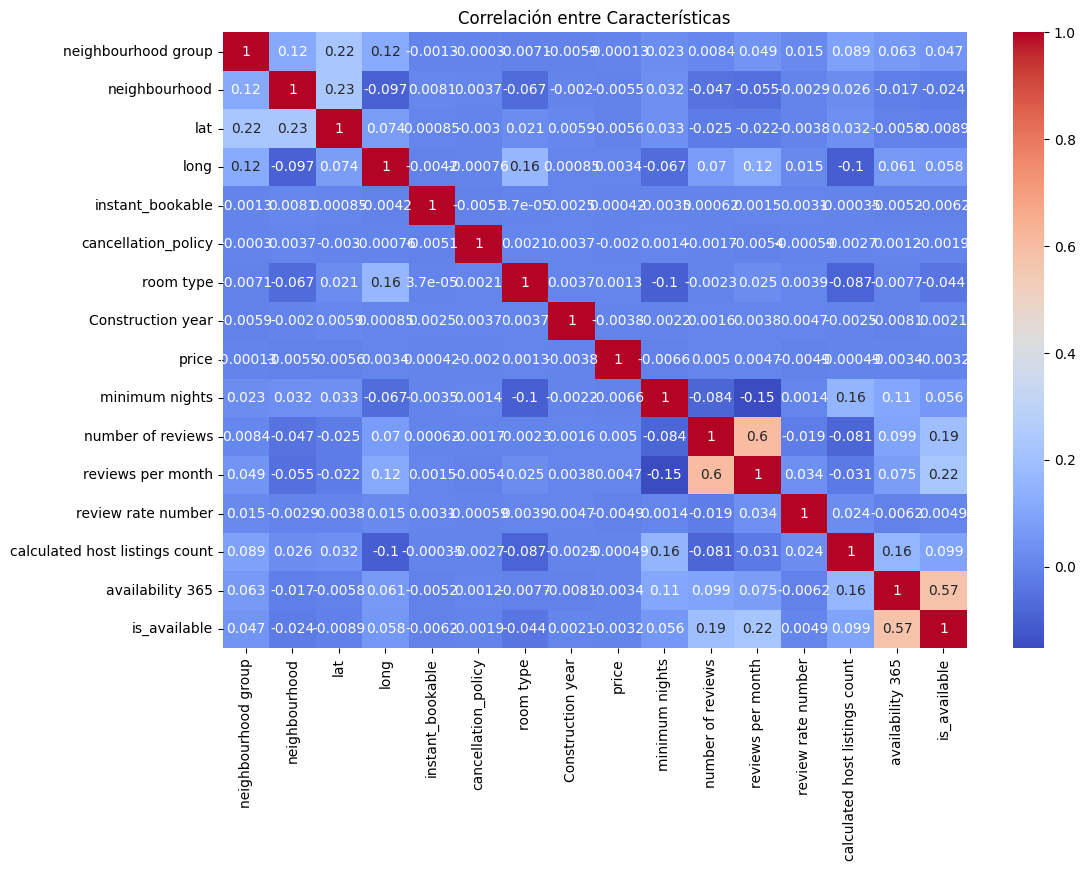

C:\Users\Nico\AppData\Local\Temp\ipykernel_15576\1114306773.py:24: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(x)


Mejores hiperparámetros encontrados: {'regressor__subsample': 0.6, 'regressor__n_estimators': 200, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__lambda': 1.5, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 3}

Resultados en el Conjunto de Prueba:
MSE: 101656.7480732012
MAE: 273.06999106182747
R2: 0.07165890059607716


C:\Users\Nico\AppData\Local\Temp\ipykernel_15576\1114306773.py:24: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(x)


In [19]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor



# Eliminar la columna 'service fee' que tiene alta correlación con el precio
# data = data.drop(columns=['service fee'])

# Análisis Exploratorio de Datos
# Visualización de la distribución de la variable objetivo
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.show()

# Visualización de la correlación entre características numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Características')
plt.show()

# Transformaciones de características
def log_transform(x):
    return np.log1p(x)

# Seleccionar características y objetivo
X = data.drop(columns=['price'])
y = data['price']

# Preprocesamiento
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('log', FunctionTransformer(log_transform))
        ]), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline de XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Definir el espacio de hiperparámetros
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__alpha': [1, 2, 3],
    'regressor__lambda': [1, 1.5, 2]
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros encontrados: {best_params}")

# Evaluar el modelo en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Imprimir los resultados del conjunto de prueba
print("\nResultados en el Conjunto de Prueba:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"R2: {test_r2}")


Analizando la columna precio probamos aplicarle una transformacion logaritmica para asi evitar posibles sesgos en la distribucion. Tambien aplicamos feature engineering al crear la columna precio por noche. La cual sera el cociente entre precio y noches minimas. Se vuelve a utilizar random forest

In [20]:


# Feature Engineering

# # Transformación de la antigüedad del edificio
# data['building_age'] = 2024 - data['Construction year']

# Precio por noche
data['price_per_night'] = data['price'] / data['minimum nights']

# Log transformación de la variable objetivo
data['log_price'] = np.log1p(data['price'])


columnas_a_eliminar = ['price','neighbourhood group','neighbourhood','instant_bookable','cancellation_policy','Construction year', 'log_price']
X = data.drop(columnas_a_eliminar, axis=1)
# Seleccionar características y objetivo
# X = data.drop(columns=['price', 'log_price'])
y = data['log_price']  # Usamos el logaritmo del precio como objetivo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Número de árboles = 100

# Entrenar el modelo
forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_forest = forest_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_forest = mean_squared_error(y_test, predictions_forest)
print("Error cuadrático medio (Random Forest):", mse_forest)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_forest = r2_score(y_test, predictions_forest)
print("Coeficiente de determinación (R-cuadrado, Random Forest):", r_squared_forest)


Error cuadrático medio (Random Forest): 4.0630225352038193e-05
Coeficiente de determinación (R-cuadrado, Random Forest): 0.9999236419545787


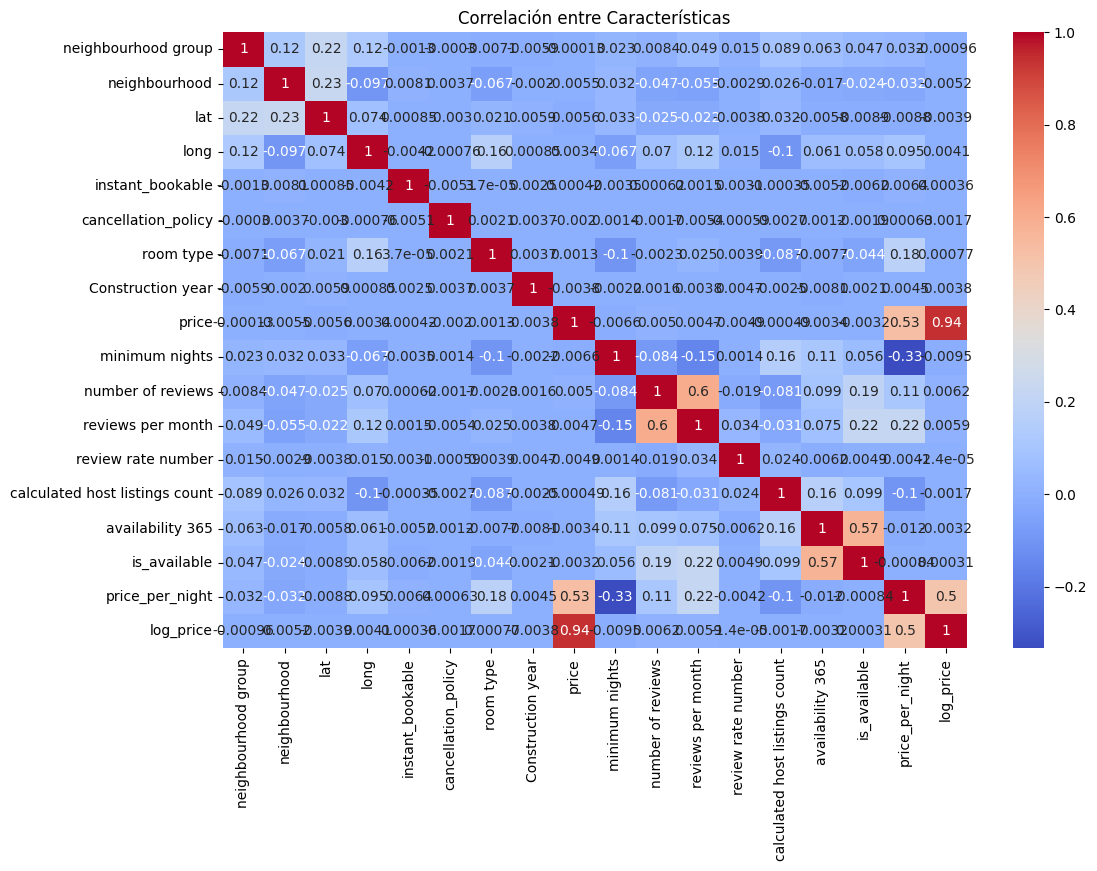

In [21]:
# Visualización de la correlación entre características numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Características')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Feature Engineering

# # Transformación de la antigüedad del edificio
# data['building_age'] = 2024 - data['Construction year']

# # Precio por noche
# data['price_per_night'] = data['price'] / data['minimum nights']

# # Log transformación de la variable objetivo
# data['log_price'] = np.log1p(data['price'])


columnas_a_eliminar = ['price','neighbourhood group','neighbourhood','instant_bookable','cancellation_policy','Construction year', 'log_price','price_per_night']
X = data.drop(columnas_a_eliminar, axis=1)
# Seleccionar características y objetivo
# X = data.drop(columns=['price', 'log_price'])
y = data['price_per_night']  # Usamos el logaritmo del precio como objetivo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Número de árboles = 100

# Entrenar el modelo
forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_forest = forest_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_forest = mean_squared_error(y_test, predictions_forest)
print("Error cuadrático medio (Random Forest):", mse_forest)

# Calcular el coeficiente de determinación (R-cuadrado)
r_squared_forest = r2_score(y_test, predictions_forest)
print("Coeficiente de determinación (R-cuadrado, Random Forest):", r_squared_forest)

Error cuadrático medio (Random Forest): 23104.175625270043
Coeficiente de determinación (R-cuadrado, Random Forest): 0.7228709224213746


Al utilizar el modelo de Random Forest con la variable precio por noche,
observamos que el modelo explica aproximadamente el 72% de la
variabilidad de los datos. Esto indica un ajuste razonablemente bueno del
modelo a los datos observados. Obtenemos un resultado mejorado en
comparación con el uso de la variable precio.